In [3]:
#adicionar 

import numpy as np # linear algebra
from numpy import sort
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


import plotly.express as px
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py
py.init_notebook_mode(connected=True)


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import warnings
warnings.simplefilter("ignore", UserWarning)

import requests
import io

import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py
py.init_notebook_mode(connected=True)

from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score


# sklearn modules for preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# from imblearn.over_sampling import SMOTE  # SMOTE
# sklearn modules for ML model selection
from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Libraries for data modelling
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Common sklearn Model Helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
# from sklearn.datasets import make_classification

# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

In [4]:
import warnings
warnings.simplefilter("ignore", UserWarning)

In [5]:
import requests
import io

In [6]:
import os

cwd = os.getcwd() 
files = os.listdir(cwd)
print("Files in %r: %s" % (cwd, files))

Files in 'c:\\Users\\19295\\OneDrive - NOVAIMS\\Bootcamp\\Projeto': ['age_2.png', 'Age_Plot.png', 'catboost_info', 'corr.png', 'Data_scaled_clusters.csv', 'Department.png', 'DistanceFromHome_Plot.png', 'educationfield.png', 'HR_clean.csv', 'HR_df_final.csv', 'HR_DS.csv', 'MonthlyIncome_Attrition.png', 'output.png', 'Projecto.ipynb', 'Projecto_Bernardo.ipynb']


In [5]:
url = 'https://raw.githubusercontent.com/catarinatomasr/projectoEDSB/main/HR_DS.csv'
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')))
data = df

In [6]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
pd.set_option('display.max_columns', 40)
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


Data Preparation/Clean

In [9]:
data.describe()
#Checking the Null Values
pd.set_option('display.max_rows', 200)
#data.isnull().sum() #no null values
#data.info()

#check for  duplicate records and have the unique records to be included into your dataset:
#data[data.duplicated()] #zero duplicated

In [10]:
#Over18 : ['Y']
#Y    1470
#so tem um unico valor, por isso vou apagar por ser inutil
#data['StandardHours'].unique() tambem so tem 1 valor, que é sempre 80
#data['EmployeeCount'].unique() tambem so tem 1 valor, que é 1

#não trazem valor 
data=data.drop('Over18', axis=1)
data=data.drop('StandardHours', axis=1)
data=data.drop('EmployeeCount', axis=1)

In [11]:
#ver os data types e ver os seus valores unicos

for column in data.columns:
    if data[column].dtype==object:
        print(str(column) + ' : ' + str(data[column].unique()))
        print(data[column].value_counts())
        print('_______________________________________________________________')


Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
_______________________________________________________________
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
_______________________________________________________________
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
_______________________________________________________________
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
_______________________________________________________________
Gender : ['Fema

In [12]:
#transformar as colunas que não sao numericas, em numericas pois os modelos n aceitam colunas texto
from sklearn.preprocessing import LabelEncoder

for column in data.columns:
    if data[column].dtype == np.int64:
            continue
    data[column]=LabelEncoder().fit_transform(data[column])

In [13]:
turnover_Summary = data.groupby('Attrition')
turnover_Summary.mean()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,37.561233,1.607461,812.504461,1.245742,8.915653,2.927007,2.231955,1027.656123,2.771290,0.593674,65.952149,2.770479,2.145985,4.386050,2.778589,1.045418,6832.739659,14265.779400,2.645580,0.234388,15.231144,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
1,33.607595,1.607595,750.362869,1.337553,10.632911,2.839662,2.329114,1010.345992,2.464135,0.632911,65.573840,2.518987,1.637131,4.835443,2.468354,1.367089,4787.092827,14559.308017,2.940928,0.535865,15.097046,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


# Describe Data
## Graphics


<AxesSubplot: xlabel='DistanceFromHome', ylabel='Count'>

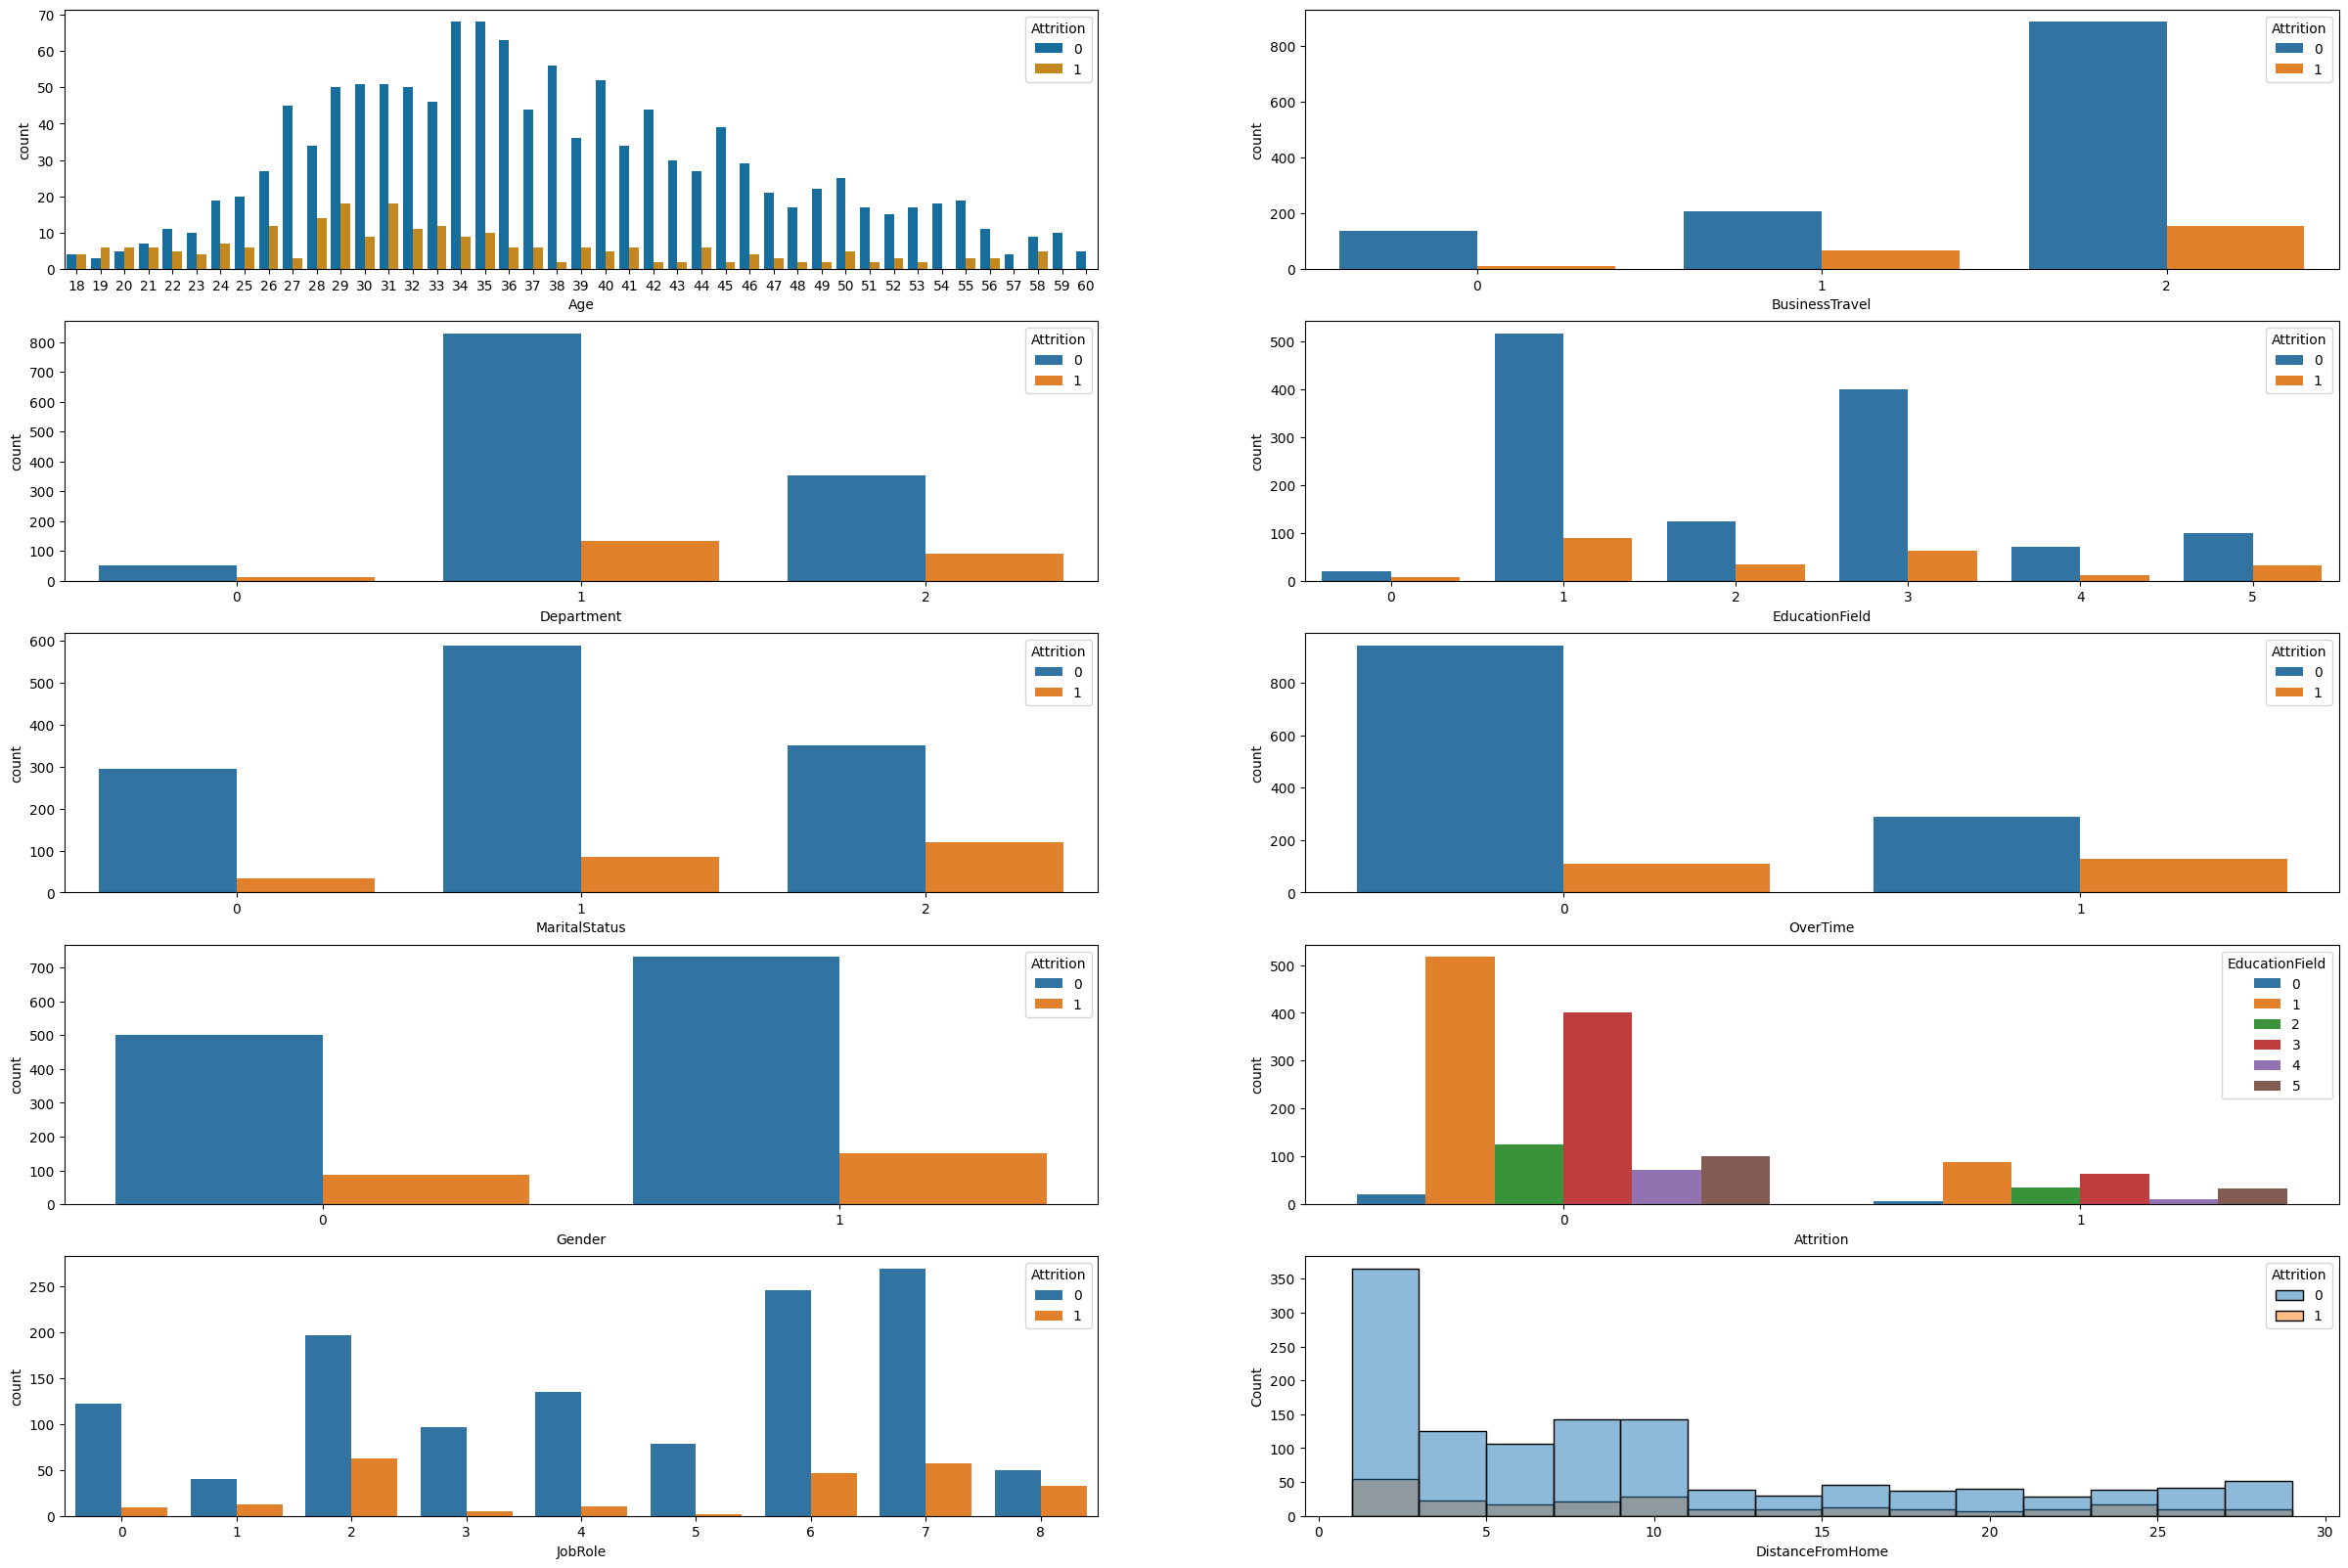

In [15]:
#Attrition em função das variaveis categoricas
fig, axes = plt.subplots(5,2, figsize = (30,20))
sns.countplot(ax = axes[0,0], data = data, x = 'Age', hue='Attrition',palette='colorblind')
sns.countplot(ax = axes[0,1],hue=data.Attrition, x=data.BusinessTravel)
sns.countplot(ax = axes[1,0],hue=data.Attrition, x=data.Department)
sns.countplot(ax = axes[1,1],hue=data.Attrition, x=data.EducationField)
sns.countplot(ax = axes[2,0],hue=data.Attrition, x=data.MaritalStatus)
sns.countplot(ax = axes[2,1],hue=data.Attrition, x=data.OverTime)
sns.countplot(ax = axes[3,0],hue=data.Attrition, x=data.Gender)
sns.countplot(ax = axes[3,1],x=data.Attrition, hue=data.EducationField)
sns.countplot(ax = axes[4,0],x='JobRole', hue='Attrition', data=data)
sns.histplot(ax = axes[4,1],hue=data.Attrition, x=data.DistanceFromHome)


In [16]:
def plot_distribution(var_select, bin_size) : 
# Calculate the correlation coefficient between the new variable and the target
    corr = data['Attrition'].corr(data[var_select])
    corr = np.round(corr,3)
    tmp1 = attrition[var_select]
    tmp2 = no_attrition[var_select]
    hist_data = [tmp1, tmp2]
    
    group_labels = ['Yes_attrition', 'No_attrition']
    colors = ['#FFD700', '#7EC0EE']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, curve_type='kde', bin_size = bin_size)
    
    fig['layout'].update(title = var_select+' '+'(corr target ='+ str(corr)+')')

    py.iplot(fig, filename = 'Density plot')

In [17]:
def barplot(var_select, x_no_numeric) :
    tmp1 = data[(data['Attrition'] != 0)]
    tmp2 = data[(data['Attrition'] == 0)]
    tmp3 = pd.DataFrame(pd.crosstab(data[var_select],data['Attrition']), )
    tmp3['Attr%'] = tmp3[1] / (tmp3[1] + tmp3[0]) * 100
    if x_no_numeric == True  : 
        tmp3 = tmp3.sort_values(1, ascending = True)

    color=['green','orange' ]
    trace1 = go.Bar(
        x=tmp1[var_select].value_counts().keys().tolist(),
        y=tmp1[var_select].value_counts().values.tolist(),
        name='Yes_Attrition', marker=dict(
        color='orange',
        line=dict(color='#000000',width=2)))

    
    trace2 = go.Bar(
        x=tmp2[var_select].value_counts().keys().tolist(),
        y=tmp2[var_select].value_counts().values.tolist(),
        name='No_Attrition', opacity = 0.9, marker=dict(
        color='green',
        line=dict(color='#000000',width=2)))
    
    trace3 =  go.Scatter(   
        x=tmp3.index,
        y=tmp3['Attr%'],
        yaxis = 'y2',
        name='% Attrition', opacity = 0.9, marker=dict(
        color='darkblue',
        line=dict(color='#000000',width=0.5
        )))

    layout = dict(title =  str(var_select),
              #width=700,
              #height=400, 
              legend =dict(yanchor = "top", y=0.99, xanchor = 'right', x=0.99),
              xaxis=dict(), 
              yaxis=dict(title= 'Count'), 
              font = dict(size = 24),
              yaxis2=dict(range= [-0, 75], 
                          overlaying= 'y', 
                          anchor= 'x', 
                          side= 'right',
                          zeroline=False,
                          showgrid= False, 
                          title= '% Attrition'
                         ))
            

    fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
    py.iplot(fig)

In [18]:
def plot_pie(var_select) :
    
    colors = ['#B9C0C9', '#CED2FD', '#ceb0ff', 'lightskyblue', 'lightgrey', '#EAB9FC', 'cyan', '#DDC8FE']
    trace1 = go.Pie(values  = attrition[var_select].value_counts().values.tolist(),
                    labels  = attrition[var_select].value_counts().keys().tolist(),
                    textfont=dict(size=15),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "attrition employes",
                    marker  = dict(colors = colors, line = dict(width = 1.5)))
    trace2 = go.Pie(values  = no_attrition[var_select].value_counts().values.tolist(),
                    labels  = no_attrition[var_select].value_counts().keys().tolist(),
                    textfont=dict(size=15), 
                    hoverinfo = "label+percent+name",
                    marker  = dict(colors = colors, line = dict(width = 1.5)),
                    domain  = dict(x = [.52,1]),
                    name    = "Non attrition employes" )

    layout = go.Layout(dict(title = var_select + " distribution in employees attrition ",
                            annotations = [dict(text = "Yes_attrition",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .22, y = -0.1),
                                            dict(text = "No_attrition",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .8,y = -.1)]))
                                          

    fig  = go.Figure(data = [trace1,trace2],layout = layout)
    py.iplot(fig)

In [19]:
attrition = data[(data['Attrition'] != 0)]
no_attrition = data[(data['Attrition'] == 0)]

trace = go.Pie(labels = ['No_attrition', 'Yes_attrition'], values = data['Attrition'].value_counts(), 
               textfont=dict(size=15),
               marker=dict(colors=['#B9C0C9','yellow'], 
               line=dict(color='#000000', width=1.5)))
layout = dict(title =  'Distribution of attrition variable')          
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

In [20]:
barplot('Age', False)

In [21]:
barplot('DistanceFromHome', False)

In [22]:
barplot('Department', True)

In [23]:
barplot('EducationField', True)

In [24]:
plot_df=data.sort_values(by="Attrition")
fig=px.histogram(plot_df, x='MonthlyIncome', color='Attrition', 
                 opacity=0.8, histnorm='density', barmode='overlay', marginal='box',
                 color_discrete_map={'Yes': '#B9C0C9','No': '#CDBBA7'})
fig.update_layout(title_text='Distribution of Monthly Income by Attrition Status',
                  xaxis_title='Monthly Income, $', yaxis_title='Density',font_color='#28221D',
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0', legend_traceorder='reversed')
fig.show()

In [25]:
plot_df=data.sort_values(by="Attrition")
fig=px.histogram(plot_df, x='OverTime', color='Attrition', 
                 opacity=0.8, histnorm='density', barmode='overlay', marginal='box',
                 color_discrete_map={'Yes': '#B9C0C9','No': '#CDBBA7'})
fig.update_layout(title_text='Distribution of Over Time by Attrition Status',
                  xaxis_title='Over Time, ', yaxis_title='Density',font_color='#28221D',
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0', legend_traceorder='reversed')
fig.show()

In [26]:
df_attrition = data[data['Attrition'] == 1]
df_attrition

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
2,37,1,2,1373,1,2,2,4,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
14,28,1,2,103,1,24,3,1,19,3,1,50,2,1,2,3,2,2028,12947,5,1,14,3,2,0,6,4,3,4,2,0,3
21,36,1,2,1218,2,9,4,1,27,3,1,82,2,1,8,1,2,3407,6986,7,0,23,4,2,0,10,4,3,5,3,0,3
24,34,1,2,699,1,6,1,3,31,2,1,83,3,1,6,1,2,2960,17102,2,0,11,3,3,0,8,2,3,4,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,1,1,638,2,9,3,2,2023,4,1,33,3,1,8,1,1,1790,26956,1,0,19,3,1,1,1,3,2,1,0,1,0
1442,29,1,2,1092,1,1,4,3,2027,1,1,36,3,1,6,4,1,4787,26124,9,1,14,3,2,3,4,3,4,2,2,2,2
1444,56,1,2,310,1,7,2,5,2032,4,1,72,3,1,2,3,1,2339,3666,8,0,11,3,4,1,14,4,1,10,9,9,8
1452,50,1,1,878,2,1,4,1,2044,2,1,94,3,2,7,3,0,6728,14255,7,0,12,3,4,2,12,3,3,6,3,0,1


In [27]:
# cost calculation 
# best rate is around 10%. what is the cost of the 6% that left the company, on avg

((df_attrition['MonthlyRate'].sum())*3)*0.06/0.16

3881875.4999999995

## Statistical analysis

<AxesSubplot: >

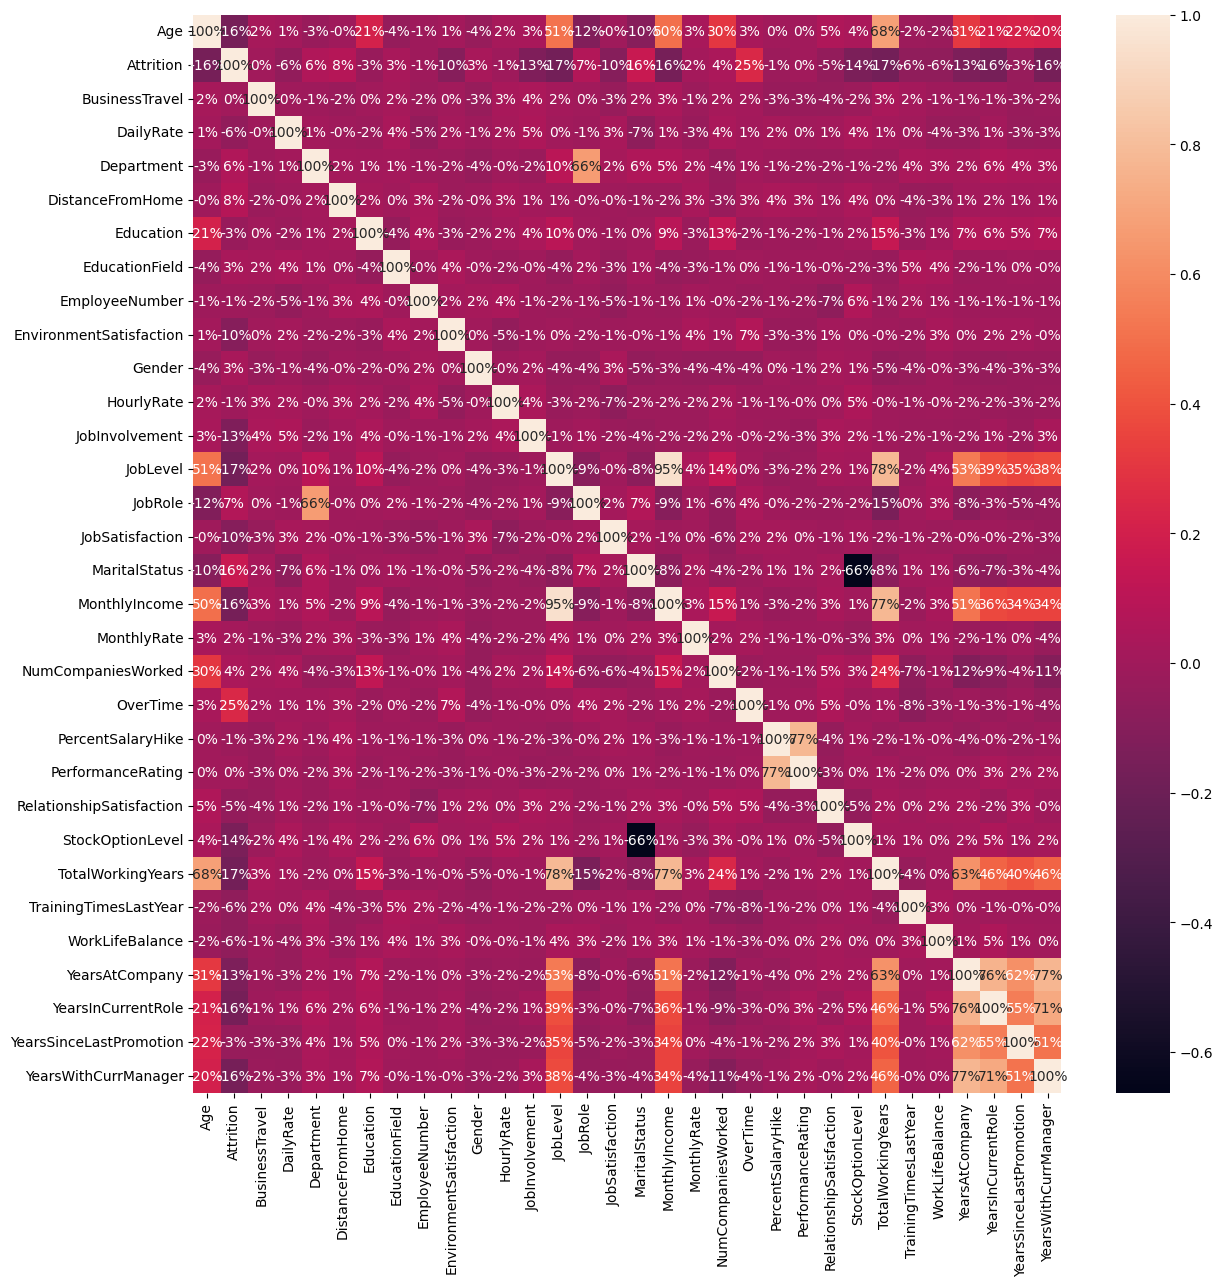

In [28]:
# ver a correlação dos dados
plt.figure(figsize=(14,14))
sns.heatmap(data.corr(), annot=True, fmt='0.0%')

# ML-Clustering/Unsupervising

#Kmeans

In [29]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [30]:
min_max = MinMaxScaler().fit(data)
data_scaled = min_max.transform(data)

In [31]:
data_scaled = pd.DataFrame(data_scaled, columns = data.columns)
data_scaled.index = data.index
data_scaled.reset_index(inplace = True)

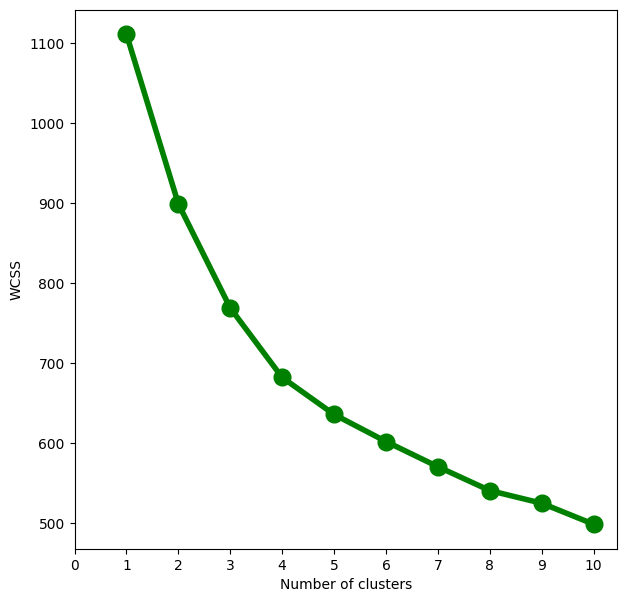

In [32]:
# find the optimal number of clusters using elbow method
from sklearn.cluster import KMeans
data_clusters = data_scaled[['Age','DistanceFromHome', 'EnvironmentSatisfaction','MonthlyIncome','StockOptionLevel','JobSatisfaction','JobInvolvement', 'YearsAtCompany','Attrition']].copy()
x = data_clusters.values
WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'green')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [67]:
model_kmeans = KMeans(n_clusters=4, random_state=100)
model_kmeans.fit(data_clusters)

KMeans(n_clusters=4, random_state=100)

In [68]:
data_clusters['label']=model_kmeans.labels_
#data_clusters
descr = data_clusters.groupby(['label']).describe().transpose()
descr

label                                   0           1           2           3
Age                     count  237.000000  476.000000  457.000000  300.000000
                        mean     0.371609    0.463635    0.472648    0.458571
                        std      0.230699    0.209873    0.212298    0.213766
                        min      0.000000    0.000000    0.023810    0.000000
                        25%      0.238095    0.309524    0.309524    0.309524
                        50%      0.333333    0.428571    0.428571    0.428571
                        75%      0.500000    0.595238    0.619048    0.595238
                        max      0.952381    1.000000    1.000000    1.000000
DistanceFromHome        count  237.000000  476.000000  457.000000  300.000000
                        mean     0.344033    0.289091    0.272976    0.287381
                        std      0.301876    0.285746    0.277595    0.299928
                        min      0.000000    0.000000    0.000000    0.000000
                        25%      0.071429    0.035714    0.035714    0.035714
                        50%      0.285714    0.214286    0.214286    0.196429
                        75%      0.571429    0.464286    0.392857    0.392857
                        max      1.000000    1.000000    1.000000    1.000000
EnvironmentSatisfaction count  237.000000  476.000000  457.000000  300.000000
                        mean     0.488045    0.833333    0.614150    0.168889
                        std      0.389930    0.166842    0.343648    0.166930
                        min      0.000000    0.666667    0.000000    0.000000
                        25%      0.000000    0.666667    0.333333    0.000000
                        50%      0.666667    0.833333    0.666667    0.333333
                        75%      1.000000    1.000000    1.000000    0.333333
                        max      1.000000    1.000000    1.000000    0.333333
MonthlyIncome           count  237.000000  476.000000  457.000000  300.000000
                        mean     0.198952    0.307512    0.313520    0.294916
                        std      0.191691    0.254990    0.256310    0.248111
                        min      0.000000    0.006319    0.002264    0.002212
                        25%      0.071827    0.110374    0.120537    0.118918
                        50%      0.115482    0.222986    0.222170    0.210400
                        75%      0.258399    0.413415    0.424434    0.357833
                        max      0.992628    1.000000    0.997051    0.998631
StockOptionLevel        count  237.000000  476.000000  457.000000  300.000000
                        mean     0.175809    0.282913    0.291028    0.265556
                        std      0.285454    0.282474    0.277766    0.282393
                        min      0.000000    0.000000    0.000000    0.000000
                        25%      0.000000    0.000000    0.000000    0.000000
                        50%      0.000000    0.333333    0.333333    0.333333
                        75%      0.333333    0.333333    0.333333    0.333333
                        max      1.000000    1.000000    1.000000    1.000000
JobSatisfaction         count  237.000000  476.000000  457.000000  300.000000
                        mean     0.489451    0.845938    0.170678    0.834444
                        std      0.372686    0.166364    0.166801    0.166941
                        min      0.000000    0.666667    0.000000    0.666667
                        25%      0.000000    0.666667    0.000000    0.666667
                        50%      0.666667    1.000000    0.333333    1.000000
                        75%      0.666667    1.000000    0.333333    1.000000
                        max      1.000000    1.000000    0.333333    1.000000
JobInvolvement          count  237.000000  476.000000  457.000000  300.000000
                        mean     0.506329    0.587535    0.598833    0.581111
                      

In [35]:
data_clusters

,Age,DistanceFromHome,EnvironmentSatisfaction,MonthlyIncome,StockOptionLevel,JobSatisfaction,JobInvolvement,YearsAtCompany,Attrition,label
0,0.547619,0.000000,0.333333,0.262454,0.000000,1.000000,0.666667,0.150,1.0,0
1,0.738095,0.250000,0.666667,0.217009,0.333333,0.333333,0.333333,0.250,0.0,2
2,0.452381,0.035714,1.000000,0.056925,0.000000,0.666667,0.333333,0.000,1.0,0
3,0.357143,0.071429,1.000000,0.100053,0.000000,0.666667,0.666667,0.200,0.0,1
4,0.214286,0.035714,0.000000,0.129489,0.333333,0.333333,0.666667,0.050,0.0,2
...,...,...,...,...,...,...,...,...,...,...
1465,0.428571,0.785714,0.666667,0.082254,0.333333,1.000000,1.000000,0.125,0.0,1
1466,0.500000,0.178571,1.000000,0.472986,0.333333,0.000000,0.333333,0.175,0.0,2
1467,0.214286,0.107143,0.333333,0.270300,0.333333,0.333333,1.000000,0.150,0.0,2
1468,0.738095,0.035714,1.000000,0.230700,0.000000,0.333333,0.333333,0.225,0.0,2


<AxesSubplot: xlabel='label', ylabel='value'>

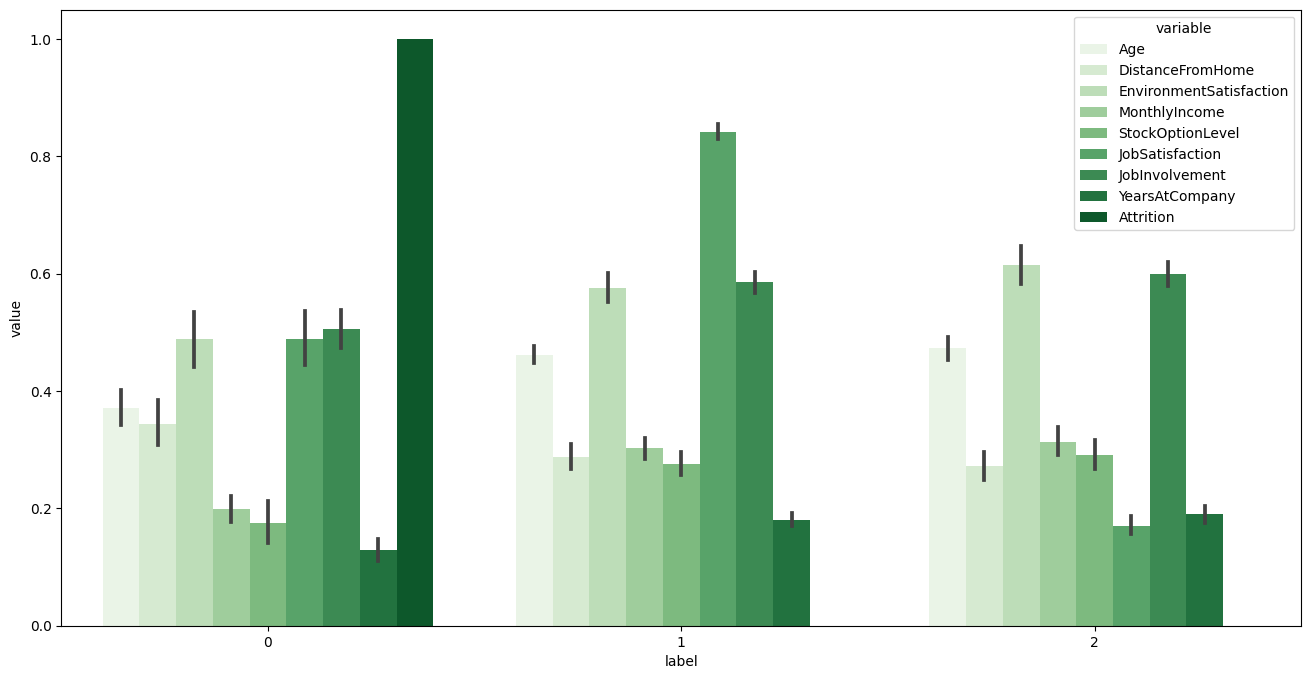

In [36]:
results_imp = data_clusters.melt(id_vars='label')
fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(x='label', y='value', hue='variable', data=results_imp, palette='Greens')

# ML- Predictive model



In [37]:
#pip install xgboost
#pip install catboost
#pip install evaluate

In [38]:
df_pred = df.copy()
df_pred.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [39]:
df_pred.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [40]:
df_pred = df_pred.drop(columns = ['EmployeeNumber','Over18','StandardHours'])

In [41]:
df_pred.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [42]:
#Transform non-numeric columns into numerical columns
from sklearn.preprocessing import LabelEncoder

for column in df_pred.columns:
        if df_pred[column].dtype == np.number:
            continue
        df_pred[column] = LabelEncoder().fit_transform(df_pred[column])

df_pred.head()

C:\Users\19295\AppData\Local\Temp\ipykernel_9892\1313177366.py:5: DeprecationWarning:

Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.



,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,1,1,0,1,0,64,2,1,7,3,2,809,999,8,1,0,0,0,0,8,0,0,6,4,0,5
1,31,0,1,113,1,7,0,1,0,2,1,31,1,1,6,1,1,682,1328,1,0,12,1,3,1,10,3,2,10,7,1,7
2,19,1,2,805,1,1,1,4,0,3,1,62,1,0,2,2,2,62,18,6,1,4,0,1,0,7,3,2,0,0,0,0
3,15,0,1,820,1,2,3,1,0,3,0,26,2,0,6,2,1,313,1228,1,1,0,0,2,0,8,3,2,8,7,3,0
4,9,0,2,312,1,1,0,3,0,0,1,10,2,0,2,1,1,399,846,9,0,1,0,3,1,6,3,2,2,2,2,2


## Data split

In [43]:
#Split the data into independent 'X' and dependent 'Y' variables
X = df_pred.drop('Attrition', axis=1)
y = df_pred.Attrition
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

## DF scale fit for training

In [44]:
scaler = MinMaxScaler(feature_range=(0, 5))
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test= pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_train.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1.785714,5.0,1.734463,5.0,0.000000,2.50,3.0,0.0,0.000000,5.0,1.285714,5.000000,1.25,4.375,0.000000,0.0,1.787834,4.011220,0.555556,0.0,3.928571,5.0,0.000000,1.666667,1.153846,4.166667,3.333333,1.250000,2.222222,0.000000,2.352941
1,3.928571,5.0,4.344633,2.5,0.535714,3.75,1.0,0.0,0.000000,5.0,0.285714,3.333333,0.00,3.750,3.333333,2.5,0.675074,1.718093,5.000000,5.0,0.357143,0.0,3.333333,5.000000,2.307692,1.666667,5.000000,1.388889,0.000000,0.666667,2.058824
2,4.047619,2.5,2.819209,2.5,4.285714,3.75,3.0,0.0,3.333333,0.0,3.642857,1.666667,3.75,2.500,5.000000,2.5,4.465875,3.404628,1.666667,0.0,3.928571,5.0,3.333333,0.000000,3.974359,2.500000,3.333333,1.250000,2.222222,0.000000,0.000000
3,0.000000,5.0,2.564972,5.0,1.607143,2.50,3.0,0.0,5.000000,0.0,2.785714,1.666667,0.00,5.000,3.333333,5.0,0.029674,1.570827,0.555556,0.0,0.357143,0.0,0.000000,0.000000,0.000000,1.666667,3.333333,0.000000,0.000000,0.000000,0.000000
4,4.761905,0.0,1.016949,2.5,0.000000,3.75,1.0,0.0,5.000000,5.0,0.142857,0.000000,1.25,0.000,3.333333,0.0,2.841246,3.029453,1.111111,5.0,0.714286,0.0,5.000000,1.666667,1.538462,1.666667,3.333333,0.694444,0.833333,0.333333,0.588235


In [45]:
def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    #print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE: {accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("\n TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    #print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE: {accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

## Logistic Regression

In [46]:
lr_clf = LogisticRegression(solver='liblinear', penalty='l1')
lr_clf.fit(X_train, y_train)

evaluate(lr_clf, X_train, X_test, y_train, y_test)



TRAINIG RESULTS: 
ACCURACY SCORE: 0.8711
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.893360    0.666667  0.871143     0.780013      0.856744
recall       0.961039    0.404494  0.871143     0.682767      0.871143
f1-score     0.925965    0.503497  0.871143     0.714731      0.857726
support    924.000000  178.000000  0.871143  1102.000000   1102.000000

 TESTING RESULTS: 
ACCURACY SCORE: 0.8859
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.896142   0.774194   0.88587    0.835168      0.876591
recall       0.977346   0.406780   0.88587    0.692063      0.885870
f1-score     0.934985   0.533333   0.88587    0.734159      0.870589
support    309.000000  59.000000   0.88587  368.000000    368.000000


## Random Forest

In [47]:
rf_clf = RandomForestClassifier(n_estimators=50, bootstrap=False)
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
ACCURACY SCORE: 1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    924.0  178.0       1.0     1102.0        1102.0

 TESTING RESULTS: 
ACCURACY SCORE: 0.8614
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.860335   0.900000  0.861413    0.880168      0.866694
recall       0.996764   0.152542  0.861413    0.574653      0.861413
f1-score     0.923538   0.260870  0.861413    0.592204      0.817295
support    309.000000  59.000000  0.861413  368.000000    368.000000


## SVM

In [48]:
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)

evaluate(svm_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
ACCURACY SCORE: 0.8739
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.880698    0.774648  0.873866     0.827673      0.863569
recall       0.982684    0.308989  0.873866     0.645836      0.873866
f1-score     0.928900    0.441767  0.873866     0.685334      0.850216
support    924.000000  178.000000  0.873866  1102.000000   1102.000000

 TESTING RESULTS: 
ACCURACY SCORE: 0.8886
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.889535   0.875000  0.888587    0.882267      0.887205
recall       0.990291   0.355932  0.888587    0.673112      0.888587
f1-score     0.937213   0.506024  0.888587    0.721618      0.868082
support    309.000000  59.000000  0.888587  368.000000    368.000000


## XGBoost

In [49]:
xgb_clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                           colsample_bytree=0.8, gamma=1.5, learning_rate=0.05,
                           max_delta_step=0, max_depth=5, min_child_weight=7,
                           n_estimators=200, n_jobs=-1, nthread=None,
                           objective='binary:logistic', random_state=0, reg_alpha=0,
                           reg_lambda=1, scale_pos_weight=1, seed=None,
                           subsample=0.6)
xgb_clf.fit(X_train, y_train)

evaluate(xgb_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
ACCURACY SCORE: 0.9265
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.923618    0.953271  0.926497     0.938445      0.928408
recall       0.994589    0.573034  0.926497     0.783811      0.926497
f1-score     0.957791    0.715789  0.926497     0.836790      0.918701
support    924.000000  178.000000  0.926497  1102.000000   1102.000000

 TESTING RESULTS: 
ACCURACY SCORE: 0.8777
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.881503   0.818182  0.877717    0.849842      0.871351
recall       0.987055   0.305085  0.877717    0.646070      0.877717
f1-score     0.931298   0.444444  0.877717    0.687871      0.853242
support    309.000000  59.000000  0.877717  368.000000    368.000000


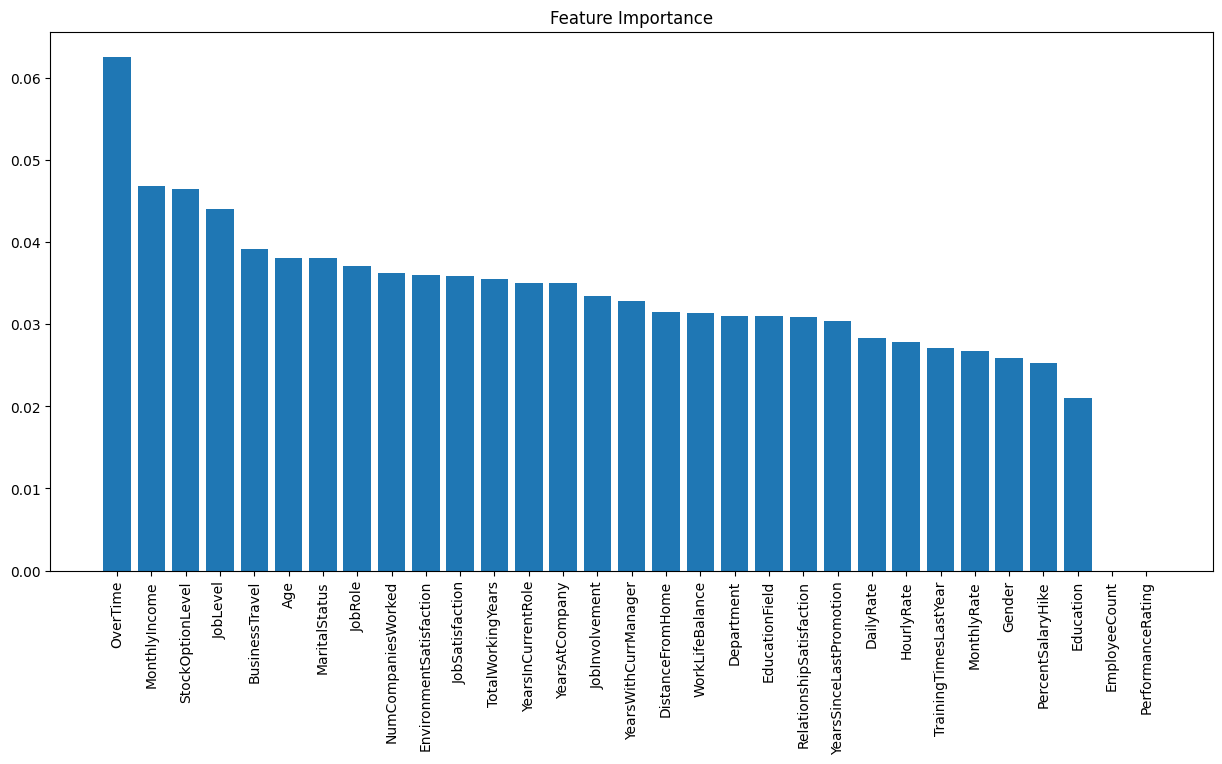

In [50]:
importances = xgb_clf.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

In [51]:
importances = xgb_clf.feature_importances_
df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(31):
    feat = X_train.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff.head(10)

,Feature,Coefficient
0,OverTime,0.062483
1,MonthlyIncome,0.046770
2,StockOptionLevel,0.046468
3,JobLevel,0.044023
4,BusinessTravel,0.039106
5,Age,0.038058
6,MaritalStatus,0.038056
7,JobRole,0.037127
8,NumCompaniesWorked,0.036245
9,EnvironmentSatisfaction,0.035953


In [52]:

model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data and evaluate
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# Fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
	# select features using threshold
	selection = SelectFromModel(model, threshold=thresh, prefit=True)
	select_X_train = selection.transform(X_train)
	# train model
	selection_model = XGBClassifier()
	selection_model.fit(select_X_train, y_train)
	# eval model
	select_X_test = selection.transform(X_test)
	y_pred = selection_model.predict(select_X_test)
	predictions = [round(value) for value in y_pred]
	accuracy = accuracy_score(y_test, predictions)
	print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Accuracy: 87.23%
Thresh=0.000, n=31, Accuracy: 87.23%
Thresh=0.000, n=31, Accuracy: 87.23%
Thresh=0.013, n=29, Accuracy: 87.23%
Thresh=0.020, n=28, Accuracy: 86.14%
Thresh=0.022, n=27, Accuracy: 85.60%
Thresh=0.023, n=26, Accuracy: 86.68%
Thresh=0.024, n=25, Accuracy: 86.96%
Thresh=0.025, n=24, Accuracy: 87.23%
Thresh=0.025, n=23, Accuracy: 87.77%
Thresh=0.026, n=22, Accuracy: 86.96%
Thresh=0.026, n=21, Accuracy: 86.96%
Thresh=0.029, n=20, Accuracy: 87.50%
Thresh=0.029, n=19, Accuracy: 86.68%
Thresh=0.029, n=18, Accuracy: 87.77%
Thresh=0.030, n=17, Accuracy: 86.96%
Thresh=0.030, n=16, Accuracy: 87.23%
Thresh=0.030, n=15, Accuracy: 87.50%
Thresh=0.030, n=14, Accuracy: 87.23%
Thresh=0.032, n=13, Accuracy: 86.68%
Thresh=0.033, n=12, Accuracy: 86.41%
Thresh=0.033, n=11, Accuracy: 85.05%
Thresh=0.036, n=10, Accuracy: 84.51%
Thresh=0.038, n=9, Accuracy: 84.24%
Thresh=0.040, n=8, Accuracy: 83.15%
Thresh=0.041, n=7, Accuracy: 82.07%
Thresh=0.047, n=6, Accuracy: 80.71%
Thresh=0.048, n=5, Accura

## CatBoost

In [53]:
cb_clf = CatBoostClassifier()
cb_clf.fit(X_train, y_train, verbose=0)

evaluate(cb_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
ACCURACY SCORE: 0.9873
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.985075    1.000000  0.987296     0.992537      0.987485
recall       1.000000    0.921348  0.987296     0.960674      0.987296
f1-score     0.992481    0.959064  0.987296     0.975773      0.987084
support    924.000000  178.000000  0.987296  1102.000000   1102.000000

 TESTING RESULTS: 
ACCURACY SCORE: 0.8723
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.870056   0.928571  0.872283    0.899314      0.879438
recall       0.996764   0.220339  0.872283    0.608551      0.872283
f1-score     0.929110   0.356164  0.872283    0.642637      0.837252
support    309.000000  59.000000  0.872283  368.000000    368.000000


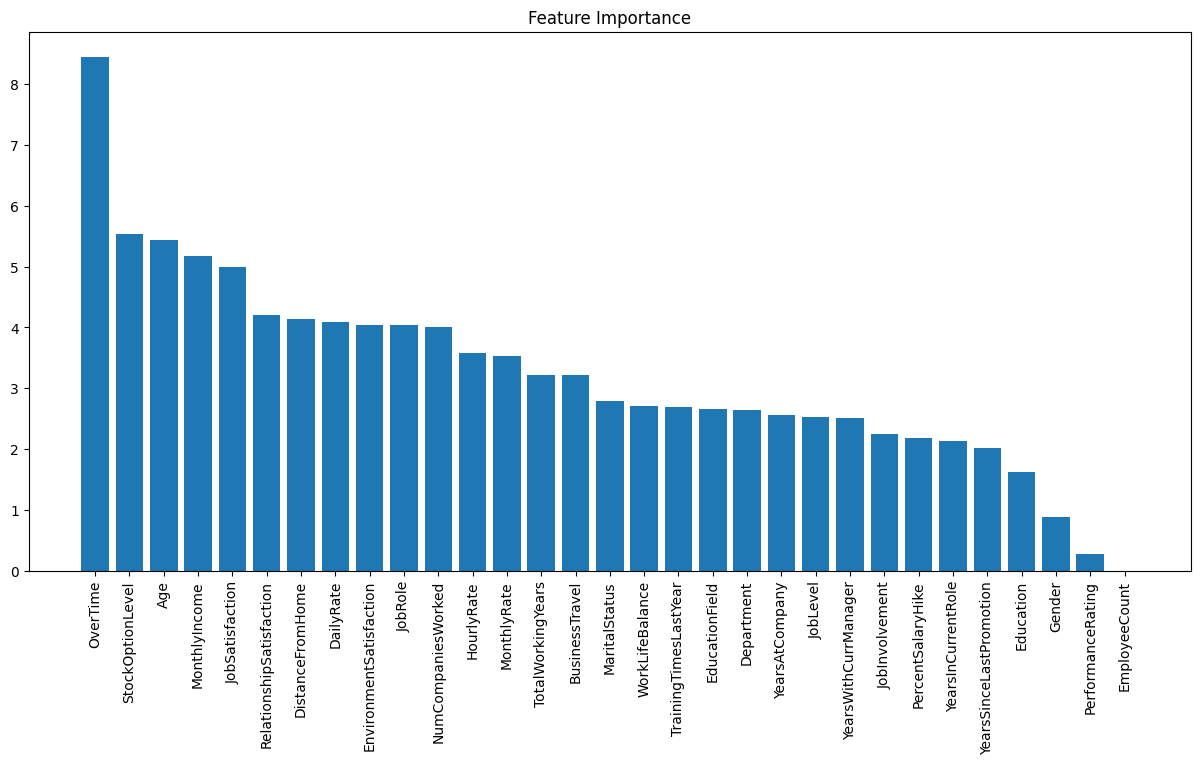

In [54]:
importances = cb_clf.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

In [55]:
importances = cb_clf.feature_importances_
df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(31):
    feat = X_train.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff.head(10)

,Feature,Coefficient
0,OverTime,8.443176
1,StockOptionLevel,5.531400
2,Age,5.430859
3,MonthlyIncome,5.168335
4,JobSatisfaction,4.984138
5,RelationshipSatisfaction,4.199380
6,DistanceFromHome,4.133270
7,DailyRate,4.083221
8,EnvironmentSatisfaction,4.044789
9,JobRole,4.039758


# Other supervised model test

In [56]:
# selection of algorithms to consider and set performance measure
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=7,
                                                         class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, random_state=7)))
models.append(('SVM', SVC(gamma='auto', random_state=7)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(random_state=7)))
models.append(('Gaussian NB', GaussianNB()))

In [57]:

acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
df_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using cross-validation
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=7, shuffle = True)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
df_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Logistic Regression,81.91,6.07,75.68,3.96
2,SVM,81.22,4.41,85.66,2.32
1,Random Forest,79.55,6.04,85.48,2.81
5,Gaussian NB,76.54,8.83,80.66,4.70
3,KNN,69.41,6.59,84.93,3.20
4,Decision Tree Classifier,62.24,6.32,78.67,4.44


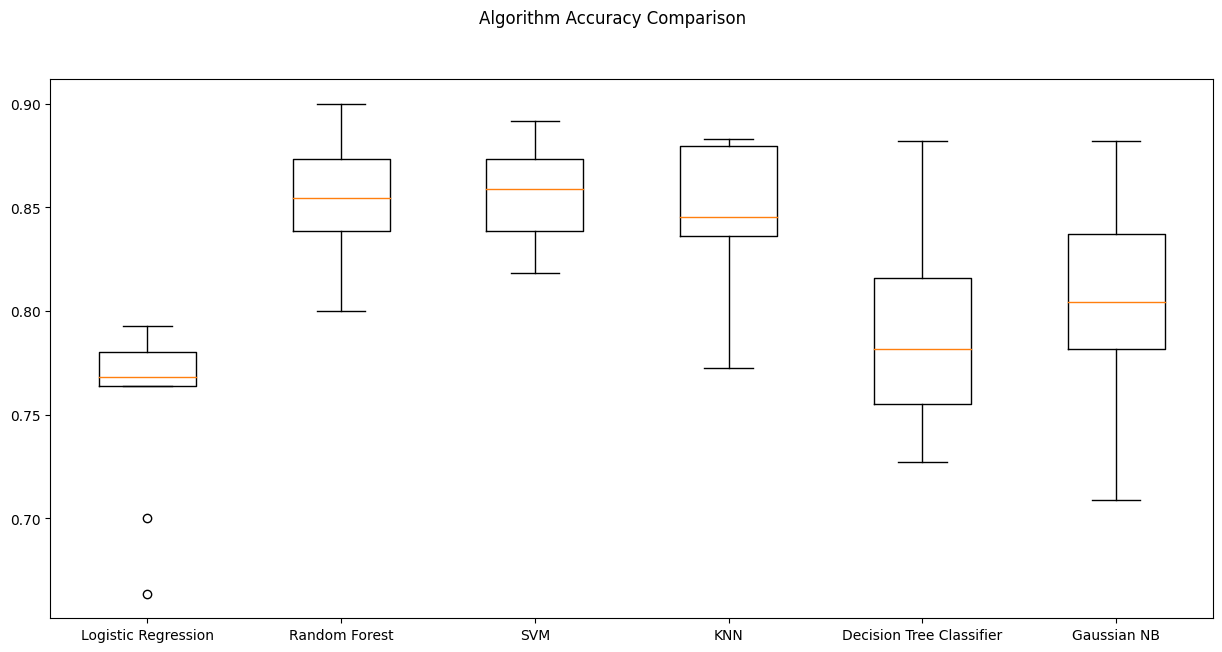

In [58]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm Accuracy Comparison')
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)
plt.show()

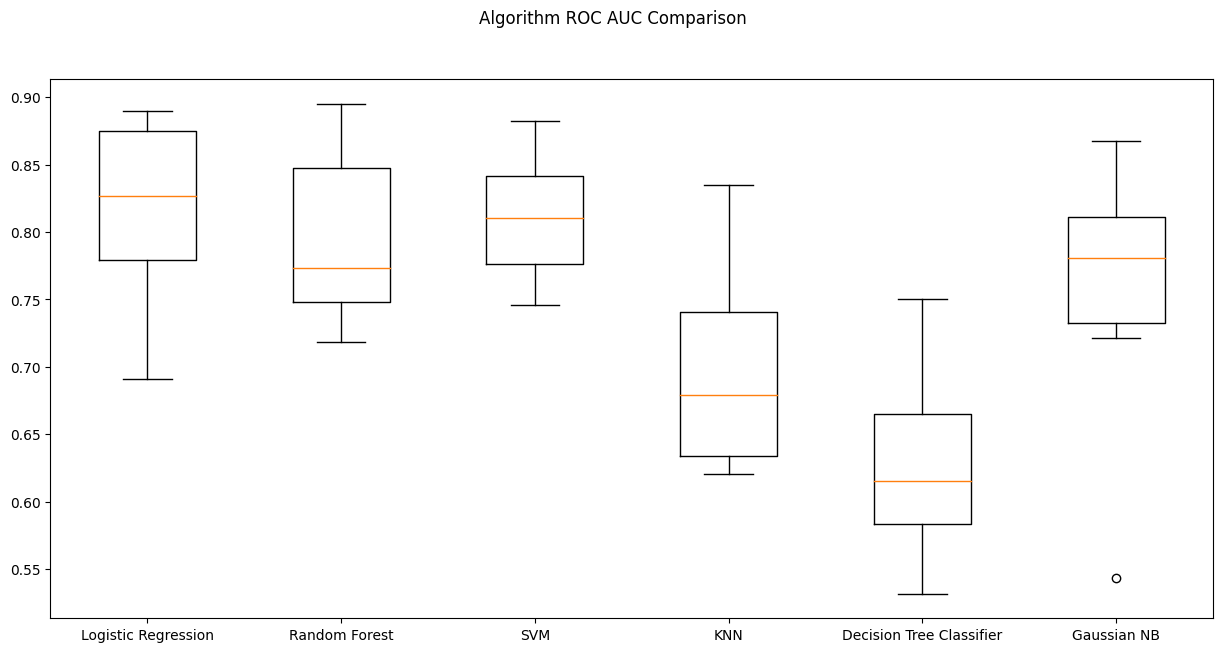

In [59]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm ROC AUC Comparison')
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)
plt.show()

In [60]:
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
modelCV = LogisticRegression(solver='liblinear',
                             class_weight="balanced", 
                             random_state=7)
scoring = 'roc_auc'
results = model_selection.cross_val_score(
    modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC score (STD): %.2f (%.2f)" % (results.mean(), results.std()))

AUC score (STD): 0.82 (0.06)


In [80]:
importances = xgb_clf.feature_importances_
df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(10):
    feat = X_train.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff.head(10)

,Feature,Coefficient
0,TotalWorkingYears,0.145387
1,OverTime,0.140533
2,YearsWithCurrManager,0.114564
3,MonthlyIncome,0.101184
4,YearsAtCompany,0.100052
5,Age,0.091660
6,DailyRate,0.078016
7,DistanceFromHome,0.077808
8,MonthlyRate,0.076398
9,HourlyRate,0.074399


## XG Boost Classifier

In [84]:
import xgboost as xgb
Xgb_train = X_train.copy()
Xgb_val = X_test.copy()

In [85]:
xg_model = xgb.XGBClassifier(max_depth = 1, n_estimators =100, random_state = 0,scale_pos_weight=2)
xg_model.fit(Xgb_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=1, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [86]:
evaluate(xg_model, Xgb_train, Xgb_val, y_train, y_test)

TRAINIG RESULTS: 
ACCURACY SCORE: 0.8678
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.894680    0.638889  0.867833     0.766784      0.853415
recall       0.954809    0.415663  0.867833     0.685236      0.867833
f1-score     0.923767    0.503650  0.867833     0.713708      0.855993
support    863.000000  166.000000  0.867833  1029.000000   1029.000000

 TESTING RESULTS: 
ACCURACY SCORE: 0.7982
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.866841   0.344828  0.798186    0.605834      0.782798
recall       0.897297   0.281690  0.798186    0.589494      0.798186
f1-score     0.881806   0.310078  0.798186    0.595942      0.789759
support    370.000000  71.000000  0.798186  441.000000    441.000000


In [87]:
probas_xg = xg_model.predict_proba(Xgb_val)

In [88]:
y_pred_xgnew = xg_model.predict(Xgb_val)
y_pred_xgnew[0:30]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1])

In [89]:
probas_xg[0:30]

array([[0.61799926, 0.38200074],
       [0.8392793 , 0.16072069],
       [0.8711793 , 0.12882073],
       [0.8297591 , 0.17024085],
       [0.3562218 , 0.6437782 ],
       [0.6535664 , 0.34643358],
       [0.8936073 , 0.10639267],
       [0.91358817, 0.0864118 ],
       [0.83786196, 0.16213804],
       [0.92237896, 0.07762106],
       [0.7300706 , 0.26992938],
       [0.87796533, 0.12203469],
       [0.5895422 , 0.4104578 ],
       [0.44169843, 0.55830157],
       [0.8209332 , 0.17906678],
       [0.76995087, 0.2300491 ],
       [0.79760957, 0.20239045],
       [0.33028078, 0.6697192 ],
       [0.85543627, 0.14456372],
       [0.44176453, 0.55823547],
       [0.46047044, 0.53952956],
       [0.9374199 , 0.06258008],
       [0.714947  , 0.28505298],
       [0.9633282 , 0.03667183],
       [0.83429986, 0.16570012],
       [0.86084574, 0.13915424],
       [0.92212963, 0.07787038],
       [0.79254323, 0.20745678],
       [0.6539588 , 0.3460412 ],
       [0.33795607, 0.6620439 ]], dtype=flo

In [90]:

df_final = df.copy()
df_final['cluster'] = model_kmeans.labels_

In [91]:
X= pd.DataFrame(scaler.transform(X), columns = X.columns)
probas_df = xg_model.predict_proba(X)
df_final['churn_proba'] = probas_df[:,1]

In [93]:
df_final.to_csv('HR_df_final.csv')

In [99]:
df_final.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,cluster,churn_proba
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,0,0.187597
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,2,0.133483
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,0,0.455011
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,1,0.557992
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,2,0.213013


# High risk clustering

In [7]:
url = 'https://raw.githubusercontent.com/catarinatomasr/projectoEDSB/main/HR_df_final.csv'
s=requests.get(url).content
df_final_risk=pd.read_csv(io.StringIO(s.decode('utf-8')))
 

In [8]:
df_final_risk = df_final_risk[(df_final_risk.Attrition == 'No') & (df_final_risk.churn_proba >= 0.5)]
df_final_risk.count()

Unnamed: 0                  39
Age                         39
Attrition                   39
BusinessTravel              39
DailyRate                   39
Department                  39
DistanceFromHome            39
Education                   39
EducationField              39
EmployeeCount               39
EmployeeNumber              39
EnvironmentSatisfaction     39
Gender                      39
HourlyRate                  39
JobInvolvement              39
JobLevel                    39
JobRole                     39
JobSatisfaction             39
MaritalStatus               39
MonthlyIncome               39
MonthlyRate                 39
NumCompaniesWorked          39
Over18                      39
OverTime                    39
PercentSalaryHike           39
PerformanceRating           39
RelationshipSatisfaction    39
StandardHours               39
StockOptionLevel            39
TotalWorkingYears           39
TrainingTimesLastYear       39
WorkLifeBalance             39
YearsAtC

In [9]:
#transformar as colunas que não sao numericas, em numericas pois os modelos n aceitam colunas texto
from sklearn.preprocessing import LabelEncoder

for column in df_final_risk.columns:
    if df_final_risk[column].dtype == np.int64:
            continue
    df_final_risk[column]=LabelEncoder().fit_transform(df_final_risk[column])

    df_final_risk.head()

In [10]:
min_max = MinMaxScaler().fit(df_final_risk)
df_final_risk_scaled = min_max.transform(df_final_risk)

In [11]:
df_final_risk_scaled = pd.DataFrame(df_final_risk_scaled, columns = df_final_risk.columns)
df_final_risk_scaled.index = df_final_risk.index
df_final_risk_scaled.reset_index(inplace = True)

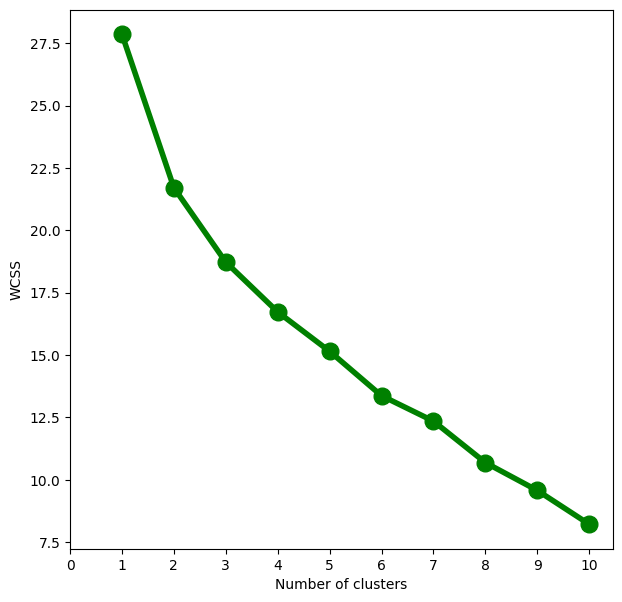

In [17]:
# find the optimal number of clusters using elbow method
from sklearn.cluster import KMeans
df_final_risk_clusters = df_final_risk_scaled[['Age','YearsInCurrentRole','DistanceFromHome', 'EnvironmentSatisfaction','MonthlyIncome','StockOptionLevel','JobSatisfaction','JobInvolvement', 'YearsAtCompany']].copy()
x = df_final_risk_clusters.values
WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'green')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [37]:
model_kmeans = KMeans(n_clusters=3, random_state=100)
model_kmeans.fit(df_final_risk_clusters)

KMeans(n_clusters=3, random_state=100)

In [38]:
df_final_risk_label = df_final_risk[['Age','YearsInCurrentRole', 'DistanceFromHome', 'EnvironmentSatisfaction','MonthlyIncome','StockOptionLevel','JobSatisfaction','JobInvolvement', 'YearsAtCompany']].copy()

In [39]:
df_final_risk_label['label']=model_kmeans.labels_
df_final_risk_clusters['label']=model_kmeans.labels_
#df_final_risk_clusters
descr = df_final_risk_label.groupby(['label']).mean().transpose()
descr

label,0,1,2
Age,29.705882,26.0,39.833333
YearsInCurrentRole,2.411765,1.3,5.250000
DistanceFromHome,12.235294,6.3,9.666667
EnvironmentSatisfaction,2.941176,3.5,1.750000
MonthlyIncome,3884.000000,2528.9,6114.000000
StockOptionLevel,0.529412,0.6,0.166667
JobSatisfaction,3.529412,1.6,1.250000
JobInvolvement,2.470588,2.8,3.083333
YearsAtCompany,5.117647,1.9,7.416667


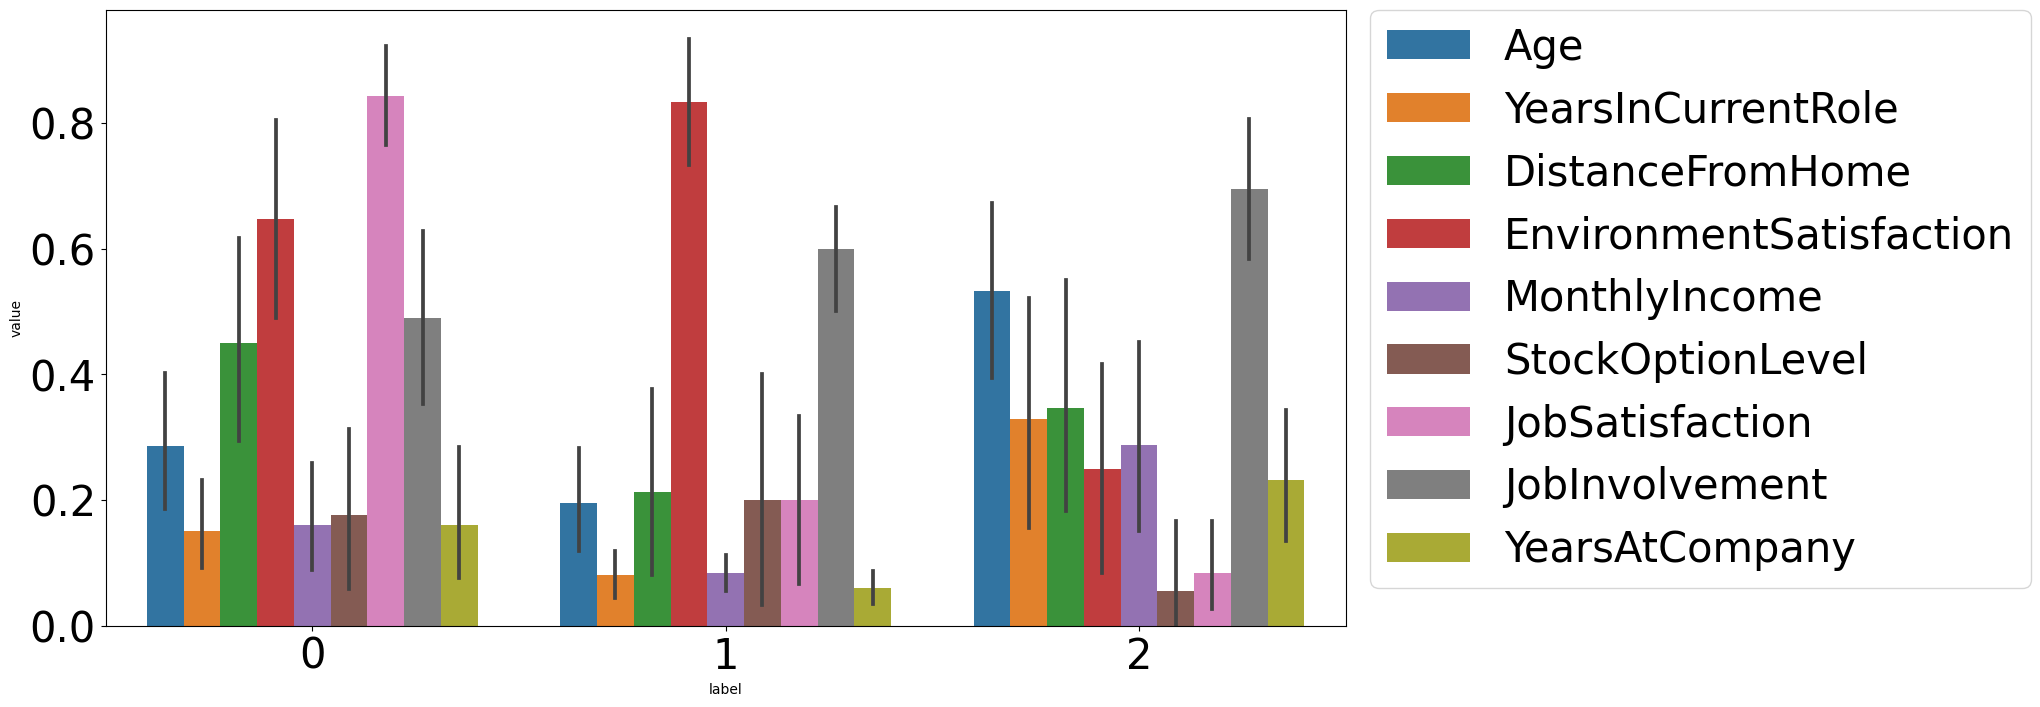

In [55]:
results_imp = df_final_risk_clusters.melt(id_vars='label')
fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(x='label', y='value', hue='variable', data=results_imp )
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize = 30)
